<a href="https://colab.research.google.com/github/jpcorreasi/MetNumUN2024II/blob/main/JuanCorreaATQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Modificaciones:

Uso de activos unicamente liquido

In [ ]:
#Función get_features()
liq = data.sel(field="is_liquid").ffill("time").bfill("time").fillna(0)

# Expand liquidity to match dimensions of result
liq_expanded = liq.expand_dims(field=result.field)  # Match the "field" dimension

# Apply liquidity filter (assets with liq == 0 will be excluded)
result = result.where(liq_expanded > 0.5, drop=True)

Cambio al S&P 500

In [ ]:
# loading S&P 500 stock data
assets = ["NAS:AAPL", "NAS:AMZN"]#, "NVDA", "GOOG", "META", "TSLA"]
stock_data = qndata.stocks.load_spx_data(tail = 365 * 5)#, assets = assets

Se incluyeron todos los activos

**Indicadores adicionados al analisis**



El TRIX (Triple Exponential Average) es un indicador técnico que mide el porcentaje de cambio en una media móvil exponencial triple de los precios durante un número determinado de períodos. Es ampliamente utilizado para identificar tendencias y filtrar el ruido en los datos de precios.

In [ ]:
trix = qnt.ta.trix(close, 14)

Stochastic: El Stochastic Oscillator es un indicador técnico que compara el precio de cierre actual de un activo con su rango de precios (máximo y mínimo) durante un número determinado de períodos. Se utiliza principalmente para identificar condiciones de sobrecompra y sobreventa, así como posibles cambios en la dirección de la tendencia.

In [ ]:
stochastic = qnt.ta.stochastic(high, low, close, 14)

La WMA (Weighted Moving Average) o Media Móvil Ponderada es un tipo de media móvil que asigna más peso a los precios más recientes y menos peso a los precios más antiguos. Esto la hace más sensible a los cambios recientes en el precio, en comparación con la media móvil simple (SMA), que da el mismo peso a todos los precios del período.

In [ ]:
wma = qnt.ta.wma(close, 20)


**Modelo usado**

El Histogram Gradient Boosting (HGB) es una variante avanzada del algoritmo tradicional de Gradient Boosting que está diseñado para mejorar la velocidad y la eficiencia al manejar grandes conjuntos de datos, el Histogram Gradient Boosting analiza los patrones, relaciones y dependencias en datos estructurados para hacer predicciones o clasificaciones de alta precisión

In [ ]:

 #Función get_model()
 model = HistGradientBoostingClassifier()

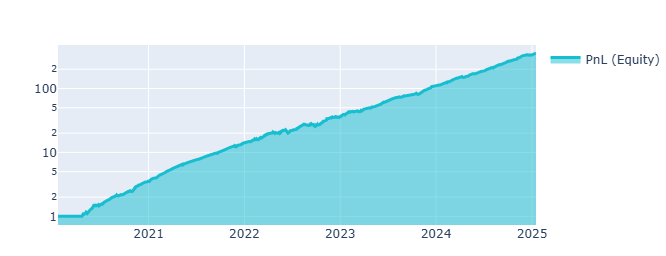

Esta es la grafica generada por el modelo y el Sharpe Ratio fue de 0.983824646
